<a href="https://colab.research.google.com/github/caballeroarturo/ejemplosR/blob/main/Sesion4/Ejemplo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # SESIÓN 4: PROBABILIDAD Y FUNCIONES DE DISTRIBUCIÓN  

Un ensayo de **Bernoulli** es un experimento aleatorio en el que sólo se pueden
obtener dos resultados: éxito o fracaso. La variable aleatoria X de este experimento
tiene probabilidad p de resultar en éxito.

Pensemos en el caso simple de lanzar una moneda justa al aire:

In [84]:
install.packages("pacman")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [86]:
# aquí solo instalamos librerias y cargamos
pacman::p_load(dplyr,plotly)

In [87]:
# es para fijar una semilla
set.seed(2022)

In [88]:
sample( c("Águila", "Sol"), # posibles resultados
       prob = c(0.5, 0.5), # probabilidades de cada posible resultado
       size = 1) # tamaño de la muestra

[1] "Águila"

In [ ]:
for (i in 1:5) {
  x <- sample( c("Águila", "Sol"), # posibles resultados
          prob = c(0.5, 0.5), # probabilidades de cada posible resultado
          size = 1) # tamaño de la muestra
  print(x)
  }

[1] "Águila"
[1] "Águila"
[1] "Sol"
[1] "Águila"
[1] "Sol"


Supongamos que nos interesa ver cuándo cae **"Águila**

In [89]:
exito <- c()

for (i in 1:5) {
  x <- sample( c("Águila", "Sol"), # posibles resultados
          prob = c(0.5, 0.5), # probabilidades de cada posible resultado
          size = 1) # tamaño de la muestra
  if (x == "Águila") {exito[i] = 1} else {exito[i]=0}
  print(x)
  }
  # exito:
  head(exito)

[1] "Águila"
[1] "Sol"
[1] "Águila"
[1] "Sol"
[1] "Águila"


[1] 1 0 1 0 1

Supongamos que la probabilidad de que salga águila es `p = 0.5` y cómo solo hay dos opciones, entonces la probabilidad de que salga sol es `1-p = 1- 0.5`




In [90]:
 exito <- c()
 n = 1000
 p = 0.5

for (i in 1:n) {
  x <- sample( c("Águila", "Sol"), # posibles resultados
          prob = c(p, 1-p), # probabilidades de cada posible resultado
          size = 1) # tamaño de la muestra
  if (x == "Águila") {exito[i] = 1} else {exito[i]=0}

  }
  # exito:
  head(exito)

[1] 0 0 0 1 0 0

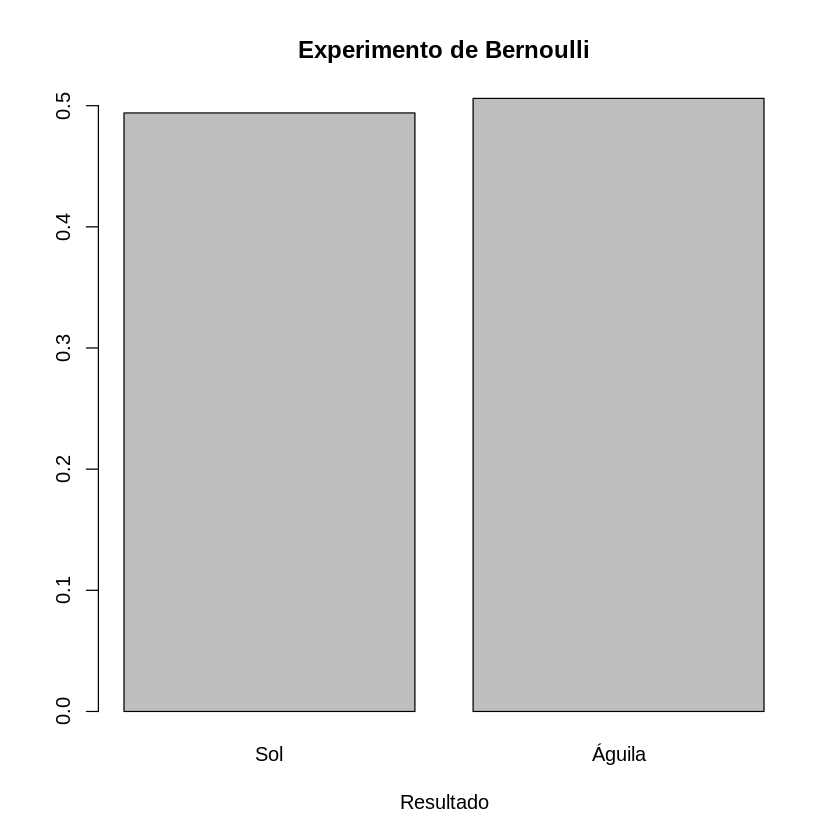

In [91]:
barplot(table(exito)/length(exito),
        main = "Experimento de Bernoulli",
        xlab = "Resultado",
        names = c("Sol", "Águila"))

Para un experimento de Bernoulli tenemos que:
  * `E[X] = p`
  * `SD[X] = sqrt(p*(1-p))`

Esto podemos comprobarlo con las funciones descriptivas que hemos visto:

In [92]:
mean(exito)
sd(exito)

[1] 0.506

[1] 0.5002142



---



Si nos decidimos a **repetir n veces un experimento de Bernoulli** y definimos la
**variable aleatoria X como el número de éxitos en n experimentos de Bernoulli**,
entonces

**X~Binomial(n,p)**

Por ejemplo: Un cliente tiene una probabilidad de 0.3 de realizar una compra en
nuestra tienda. Si al día tenemos 10 clientes, ¿cuál es la probabilidad de que
exactamente 0, 2, 4 y 10 de ellos realizan una compra?"

In [117]:
# Función de distribución binomial

dbinom( x=0,             # Cantidad de exitos
        size = 1,        # Cantidad de lanzamientos
        prob = 0.5)      # Probabilidad de éxito en cada evento

[1] 0.5

![image.png]()[texto del vínculo](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.probabilidadyestadistica.net%2Fdiagrama-de-arbol%2F&psig=AOvVaw0-2Sn7795fU1oiHSm26r6g&ust=1705436620719000&source=images&cd=vfe&opi=89978449&ved=2ahUKEwipx_7QnOCDAxX2xMkDHVjTCnQQjRx6BAgAEBc)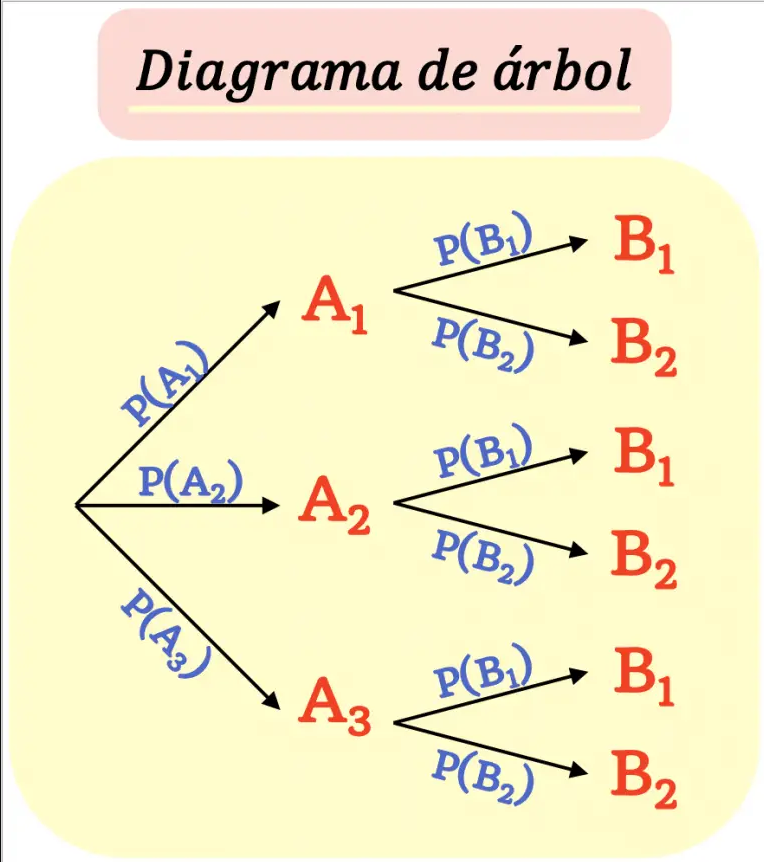

In [111]:
# Probabilidad de que en 3 lanzamientos, se obtengan 2 águilas

# P(X=2), donde X es una Binomial(3, 0.5)

dbinom(x=2, size = 3, prob = 0.5)

#  1,0,1
#  0,1,1
#  1,1,0

3*(0.5*0.5*0.5)

[1] 0.375

[1] 0.375

In [95]:
dbinom(x = 0, size = 10, prob = 0.3) # P(X=0), donde X es una Binomial(10, 0.3)
dbinom(x = 2, size = 10, prob = 0.3)
dbinom(x = 4, size = 10, prob = 0.3)
dbinom(x = 6, size = 10, prob = 0.3)
dbinom(x = 8, size = 10, prob = 0.3)
dbinom(x = 10, size = 10, prob = 0.3)


[1] 0.02824752

[1] 0.2334744

[1] 0.2001209

[1] 0.03675691

[1] 0.001446701

[1] 5.9049e-06

Como podemos observar, la probabilidad va incrementando y posteriormente disminuye.
Esto nos da una idea de cómo se comporta la distribución del número de clientes
que realizan una compra por día. Veamos ahora la distribución real de X:

binom
   0    1    2    3    4    5    6    7    8    9 
 294 1196 2371 2551 2111 1005  372   86   12    2 

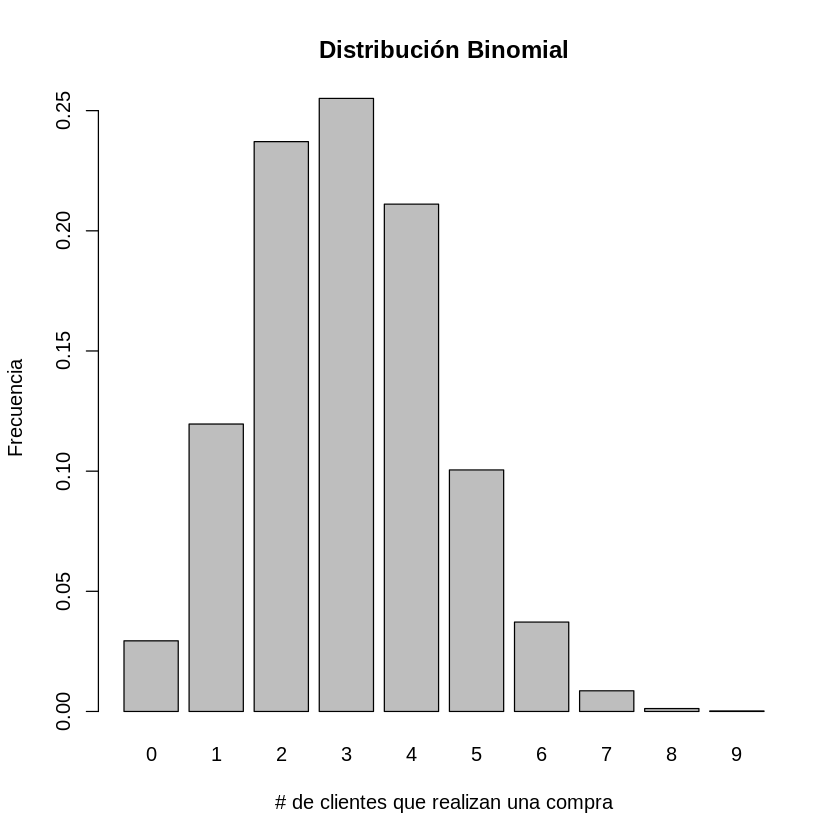

In [134]:
# rbinom() génera n cantidad de repeticiones del mismo experimento y cuenta la cantidad de exitos en cada uno

binom <- rbinom(n = 10000,     # Cantidad de observaciones generadas
                size = 10,     # Número de eventos
                prob = 0.3)    # Probabilidad de éxito en cada evento

table(binom)

barplot(table(binom)/length(binom),
        main = "Distribución Binomial",
        xlab = "# de clientes que realizan una compra",
        ylab = "Frecuencia")

In [119]:
length(binom) # cantidad de observaciones

[1] 10000

In [137]:
mean(binom)

[1] 3.0008



---


¿Cuál es la probabilidad de que menos de 4 clientes realicen una compra?
 `P(x<4)`

Para ello podríamos sumar todas las probabilidades desde x = 0 hasta x = 4, pero existe otra forma más fácil con la **función de distribución acumulada**:

In [139]:
# usando la distribución de probabilidad

dbinom(x = 0, size = 10, prob = 0.3) +  # probabilidad de que ningún cliente compre, dado que llegan 10 clientes a la tienda
dbinom(x = 1, size = 10, prob = 0.3) +  # que 1 cliente compre
dbinom(x = 2, size = 10, prob = 0.3) +  # que 2 clientes compren
dbinom(x = 3, size = 10, prob = 0.3)    # que 3 clientes compren



[1] 0.6496107

In [140]:
# con la función de distribución acumulada
pbinom(q = 3, size = 10, prob = 0.3, lower.tail = TRUE)   # P(X <= 3) = P(X < 4)

[1] 0.6496107

¿Cuál es la probabilidad de que más de 5 clientes realicen una compra?

In [141]:
dbinom(x = 6, size = 10, prob = 0.3) +
dbinom(x = 7, size = 10, prob = 0.3) +
dbinom(x = 8, size = 10, prob = 0.3) +
dbinom(x = 9, size = 10, prob = 0.3) +
dbinom(x = 10, size = 10, prob = 0.3)

pbinom(q = 5, size = 10, prob = 0.3, lower.tail = FALSE)
1 - pbinom(q = 5, size = 10, prob = 0.3, lower.tail = TRUE)

[1] 0.04734899

[1] 0.04734899

[1] 0.04734899

Para una distribución binomial tenemos que:

    *   E[X] = size*p
    *   SD[X] = sqrt(size*p*(1-p))

Esto podemos comprobarlo con las funciones descriptivas que hemos visto:

In [142]:
mean(binom)
sd(binom)

[1] 3.0008

[1] 1.450176



---

Como pudiste darte cuenta en la gráfica de distribución de nuestra variable aleatoria, esta está sesgada hacia la derecha. El sesgo de la distribución depende del parámetro p

[1] "Como pudiste darte cuenta en la gráfica de distribución de nuestra variable aleatoria,\nesta está sesgada hacia la derecha. El sesgo de la distribución depende del parámetro p"

null device 
          1

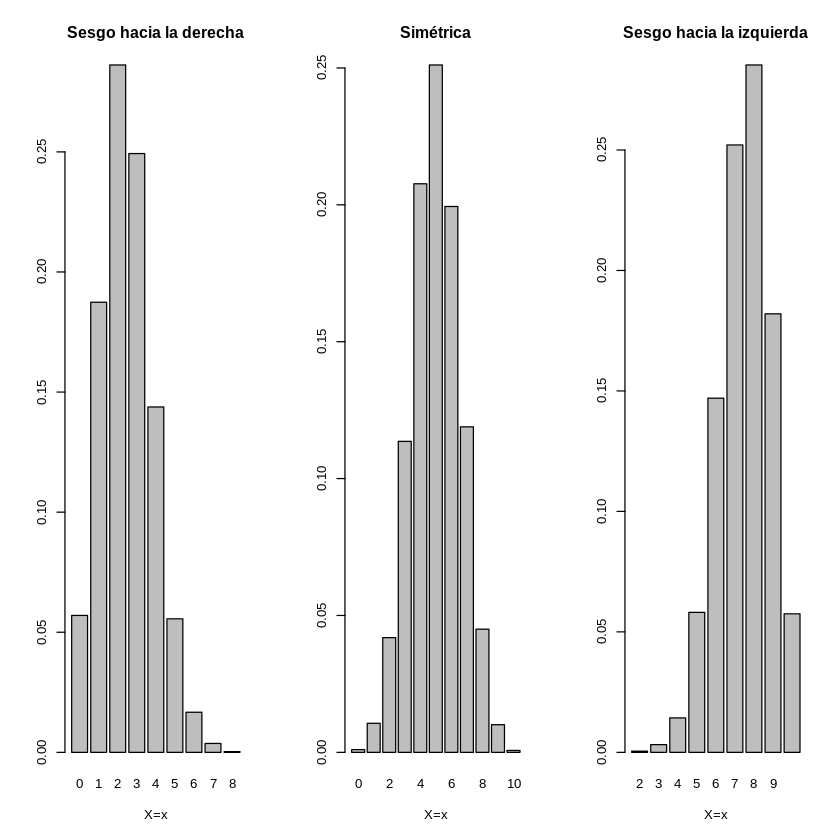

In [143]:

{par(mfrow=c(1,3))
binom.der <- rbinom(n = 10000, size = 10, prob = 0.25)
barplot(table(binom.der)/length(binom.der),
        main = "Sesgo hacia la derecha",
        xlab = "X=x")
binom.sim <- rbinom(n = 10000, size = 10, prob = 0.5)
barplot(table(binom.sim)/length(binom.sim),
        main = "Simétrica",
        xlab = "X=x")
binom.izq <- rbinom(n = 10000, size = 10, prob = 0.75)
barplot(table(binom.izq)/length(binom.izq),
        main = "Sesgo hacia la izquierda",
        xlab = "X=x")}
dev.off()